In [130]:
import pandas as pd
import numpy as np

df = pd.read_csv('port_data6km_ct.csv')


In [131]:
df

,Unnamed: 0,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,load_change,coords,vessel_type_num,vessel_type_name
0,0,245257000,0.0,0.0,0.1,13.1,36.0,-4.465718,48.382490,1443650402,0.0,POINT (-4.4657183 48.38249),70.0,Cargo
1,9,245257000,0.0,0.0,0.0,13.1,35.0,-4.465720,48.382507,1443650413,0.0,POINT (-4.46572 48.382507),70.0,Cargo
2,17,245257000,0.0,0.0,0.0,13.1,35.0,-4.465722,48.382520,1443650423,0.0,POINT (-4.4657216 48.38252),70.0,Cargo
3,27,245257000,0.0,0.0,0.1,13.1,35.0,-4.465728,48.382526,1443650433,0.0,POINT (-4.4657283 48.382526),70.0,Cargo
4,35,245257000,0.0,0.0,0.0,13.1,35.0,-4.465737,48.382534,1443650442,0.0,POINT (-4.465737 48.382534),70.0,Cargo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008443,18083937,305370000,5.0,0.0,0.0,225.6,188.0,-4.471628,48.382446,1459460757,0.0,POINT (-4.471628 48.382446),70.0,Cargo
1008444,18083966,305370000,5.0,0.0,0.0,225.6,188.0,-4.471615,48.382446,1459460937,0.0,POINT (-4.471615 48.382446),70.0,Cargo
1008445,18083987,305370000,5.0,0.0,0.0,225.6,188.0,-4.471635,48.382420,1459461117,0.0,POINT (-4.471635 48.38242),70.0,Cargo
1008446,18084035,305370000,5.0,0.0,0.0,225.6,188.0,-4.471668,48.382427,1459461297,0.0,POINT (-4.4716682 48.382427),70.0,Cargo


In [132]:
import shapely.wkt
#df.coords = df.coords.apply(shapely.wkt.loads(str(coords)))

In [133]:
df['new_berth'] = df.sort_values('t').groupby('sourcemmsi').navigationalstatus.diff()>0

In [134]:
test_df = df[(df.navigationalstatus==5) & (df.new_berth)]

In [135]:
from sklearn.cluster import DBSCAN
import geopandas as gpd

df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs='epsg:4326')

In [136]:
df_geo[df_geo.speedoverground<0.3]

,Unnamed: 0,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,load_change,coords,vessel_type_num,vessel_type_name,new_berth,geometry
0,0,245257000,0.0,0.0,0.1,13.1,36.0,-4.465718,48.382490,1443650402,0.0,POINT (-4.4657183 48.38249),70.0,Cargo,False,POINT (-4.46572 48.38249)
1,9,245257000,0.0,0.0,0.0,13.1,35.0,-4.465720,48.382507,1443650413,0.0,POINT (-4.46572 48.382507),70.0,Cargo,False,POINT (-4.46572 48.38251)
2,17,245257000,0.0,0.0,0.0,13.1,35.0,-4.465722,48.382520,1443650423,0.0,POINT (-4.4657216 48.38252),70.0,Cargo,False,POINT (-4.46572 48.38252)
3,27,245257000,0.0,0.0,0.1,13.1,35.0,-4.465728,48.382526,1443650433,0.0,POINT (-4.4657283 48.382526),70.0,Cargo,False,POINT (-4.46573 48.38253)
4,35,245257000,0.0,0.0,0.0,13.1,35.0,-4.465737,48.382534,1443650442,0.0,POINT (-4.465737 48.382534),70.0,Cargo,False,POINT (-4.46574 48.38253)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008443,18083937,305370000,5.0,0.0,0.0,225.6,188.0,-4.471628,48.382446,1459460757,0.0,POINT (-4.471628 48.382446),70.0,Cargo,False,POINT (-4.47163 48.38245)
1008444,18083966,305370000,5.0,0.0,0.0,225.6,188.0,-4.471615,48.382446,1459460937,0.0,POINT (-4.471615 48.382446),70.0,Cargo,False,POINT (-4.47161 48.38245)
1008445,18083987,305370000,5.0,0.0,0.0,225.6,188.0,-4.471635,48.382420,1459461117,0.0,POINT (-4.471635 48.38242),70.0,Cargo,False,POINT (-4.47164 48.38242)
1008446,18084035,305370000,5.0,0.0,0.0,225.6,188.0,-4.471668,48.382427,1459461297,0.0,POINT (-4.4716682 48.382427),70.0,Cargo,False,POINT (-4.47167 48.38243)


In [137]:
from sklearn.datasets import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)


In [138]:
def calculate_distance_and_speed(df):
    df = df.drop_duplicates(['id','t'])
    df = df.sort_values(['id', 't'])
    df['dt'] = (df.groupby('id')['t'].diff()).values  # Diff Time in seconds
    df['lon_prev'] = np.radians((df.groupby('id')['lon'].shift()).values)  
    df['lat_prev'] = np.radians((df.groupby('id')['lat'].shift()).values)
    df['lonrad'] = np.radians(df['lon'])
    df['latrad'] = np.radians(df['lat'])
    dlon = df.lon_prev - df.lonrad 
    dlat = df.lat_prev - df.latrad
    a = np.sin(dlat/2)**2 + np.cos(df.latrad) * np.cos(df.lat_prev) * np.sin(dlon/2)**2
    df['dist_m'] = (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))*6371000
    df['calculated_speed'] = df.dist_m/df.dt
    return df

In [139]:
df_geo = calculate_distance_and_speed(df_geo.rename(columns={'sourcemmsi':'id'}))

In [140]:
# remove all datapoints where speed > 0.5
df_geo = df_geo[df_geo.calculated_speed<0.5]

In [141]:
df_geo

,Unnamed: 0,id,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,...,vessel_type_name,new_berth,geometry,dt,lon_prev,lat_prev,lonrad,latrad,dist_m,calculated_speed
728020,16100082,207138000,15.0,-127.0,0.0,32.2,511.0,-4.471833,48.381720,1450258134,...,Cargo,False,POINT (-4.47183 48.38172),9.0,-0.078048,0.844420,-0.078048,0.844420,0.147704,0.016412
728023,16100096,207138000,15.0,-127.0,0.0,47.2,511.0,-4.471849,48.381634,1450258155,...,Cargo,False,POINT (-4.47185 48.38163),10.0,-0.078048,0.844419,-0.078048,0.844419,1.144704,0.114470
728024,16100098,207138000,15.0,-127.0,0.0,59.2,511.0,-4.471873,48.381630,1450258166,...,Cargo,False,POINT (-4.47187 48.38163),11.0,-0.078048,0.844419,-0.078049,0.844419,1.884760,0.171342
728025,16100102,207138000,15.0,-127.0,0.0,45.0,511.0,-4.471858,48.381650,1450258174,...,Cargo,False,POINT (-4.47186 48.38165),8.0,-0.078049,0.844419,-0.078049,0.844419,2.477981,0.309748
728026,6171390,207138000,15.0,-127.0,0.0,37.6,511.0,-4.471865,48.381680,1450258185,...,Cargo,False,POINT (-4.47187 48.38168),11.0,-0.078049,0.844419,-0.078049,0.844420,3.370210,0.306383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877272,17099589,664209000,5.0,-127.0,0.0,0.0,511.0,-4.453042,48.381287,1454626824,...,Tanker,False,POINT (-4.45304 48.38129),180.0,-0.077720,0.844413,-0.077720,0.844413,0.000000,0.000000
877276,17099646,664209000,5.0,-127.0,0.0,0.0,511.0,-4.453042,48.381287,1454627007,...,Tanker,False,POINT (-4.45304 48.38129),183.0,-0.077720,0.844413,-0.077720,0.844413,0.000000,0.000000
877280,17099680,664209000,5.0,-127.0,0.0,0.0,511.0,-4.453042,48.381287,1454627189,...,Tanker,False,POINT (-4.45304 48.38129),182.0,-0.077720,0.844413,-0.077720,0.844413,0.000000,0.000000
877284,17099730,664209000,5.0,-127.0,0.0,0.0,511.0,-4.453042,48.381287,1454627371,...,Tanker,False,POINT (-4.45304 48.38129),182.0,-0.077720,0.844413,-0.077720,0.844413,0.000000,0.000000


In [142]:
df_moored = df[df.navigationalstatus==5]

In [143]:
coords = df_moored[['lat', 'lon']].values

In [144]:
'''
dbo = df_geo.to_crs(epsg=3857)
import contextily as cx
ax = dbo.plot(markersize=0.1, color='red')
cx.add_basemap(ax, crs=dbo.crs.to_string())
'''

"\ndbo = df_geo.to_crs(epsg=3857)\nimport contextily as cx\nax = dbo.plot(markersize=0.1, color='red')\ncx.add_basemap(ax, crs=dbo.crs.to_string())\n"

In [145]:
#db.set_geometry('geometry', inplace=True)

In [146]:
#df_moored['weight'] = 
df_sizes = df_moored.groupby(['lon', 'lat']).size()

In [147]:
'''
for index in df_sizes.index:
    mask = ((df_moored.lat == index[1]) & (df_moored.lon == index[0]))
    df_moored.loc[mask, 'weight'] = df_sizes[index]
'''

"\nfor index in df_sizes.index:\n    mask = ((df_moored.lat == index[1]) & (df_moored.lon == index[0]))\n    df_moored.loc[mask, 'weight'] = df_sizes[index]\n"

In [148]:
df_moored.drop_duplicates(subset = ['lon', 'lat'], inplace =True)

/home/jussiste/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [149]:
coords = test_df[['lat', 'lon']].values
#weights = df_moored.weight.values

In [150]:
len(coords)

219

In [151]:
coords = test_df[['lat', 'lon']].values
kms_per_radian = 6371.0088
epsilon = 0.1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))


In [152]:
import matplotlib.pyplot as plt
db.labels_

array([ 0,  1,  2,  3,  1,  2,  0,  1,  2,  0,  0,  4,  4,  1,  0,  2,  0,
        5,  1,  1,  6,  0, -1,  2,  6,  1,  2,  1,  2,  1,  7,  4,  1,  0,
        0,  1,  1,  0,  0,  4,  0,  1,  5,  1,  2,  1,  0,  5,  4,  3,  1,
        2,  8,  1,  4,  0,  8,  0,  1,  1,  4,  0,  9,  2,  1,  0,  5,  5,
        5,  9,  1, -1,  0,  1,  1,  0,  5,  4,  4,  1,  0,  9,  0,  0, 10,
        0,  0,  9,  1,  0,  1,  1,  0,  4,  5,  1, -1,  9,  1,  2,  0,  4,
        1,  1,  5,  0,  1,  1,  4,  0, -1,  5,  1,  4,  0,  0,  1,  3, 11,
        0,  1,  4,  7, -1,  1,  0,  1,  0,  5,  1,  1,  0, 11,  8,  7,  3,
        1,  7,  1,  0,  4,  1,  1,  0, 11,  7,  4,  0,  4,  0,  5,  1,  0,
        1,  0,  0,  1,  0,  4,  0, -1,  4,  1,  3,  0,  0,  1,  5,  1,  4,
       10,  0,  3,  1,  8,  5,  1,  0,  1, 11,  5,  1,  0,  1,  0,  0,  0,
        1,  0,  4,  7,  1,  1,  4,  6,  1,  0,  4,  0,  2,  5,  1,  0,  6,
        1,  0,  1,  0,  6,  4, -1,  0, 11,  1, 11,  4, 10,  0,  1])

In [153]:
test_df['cluster'] = db.labels_

/home/jussiste/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:ylabel='distance'>

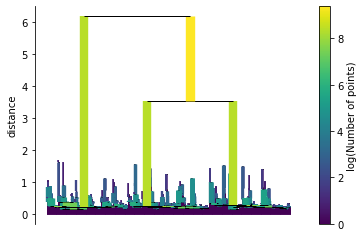

In [154]:
import hdbscan
from sklearn.datasets import make_blobs

data, _ = make_blobs(1000)

clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(data)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()


In [155]:
coords = coords.astype('float32')

In [156]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=3, gen_min_span_tree=True, metric='haversine')
clusterer.fit(np.radians(coords))

HDBSCAN(gen_min_span_tree=True, metric='haversine', min_cluster_size=3,
        min_samples=3)

In [157]:
test_df

,Unnamed: 0,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,load_change,coords,vessel_type_num,vessel_type_name,new_berth,cluster
7353,91811,565494000,5.0,0.0,0.0,231.4,217.0,-4.452681,48.382110,1443760172,0.0,POINT (-4.4526815 48.38211),80.0,Tanker,True,0
9118,185073,305709000,5.0,-6.0,0.0,272.0,214.0,-4.463350,48.384710,1443852837,0.0,POINT (-4.46335 48.38471),71.0,Cargo,True,1
25895,332767,304655000,5.0,0.0,0.0,276.7,81.0,-4.470063,48.380688,1444031512,0.0,POINT (-4.470063 48.380688),70.0,Cargo,True,2
35095,14949954,273413060,5.0,-7.0,0.0,12.0,172.0,-4.477248,48.382816,1444107605,0.0,POINT (-4.477248 48.382816),79.0,Cargo,True,3
37310,428470,356101000,5.0,0.0,0.1,190.2,217.0,-4.464658,48.382935,1444121288,0.0,POINT (-4.4646583 48.382935),70.0,Cargo,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999724,17991205,477820000,5.0,0.0,0.5,16.5,273.0,-4.467243,48.380295,1459009734,0.0,POINT (-4.467243 48.380295),70.0,Cargo,True,11
1001616,14590219,305370000,5.0,0.0,0.1,24.7,188.0,-4.471704,48.382380,1459104895,0.0,POINT (-4.4717035 48.38238),70.0,Cargo,True,4
1003514,14643643,249297000,5.0,0.0,0.0,10.0,35.0,-4.454690,48.382965,1459202578,0.0,POINT (-4.45469 48.382965),70.0,Cargo,True,10
1004474,14671353,247224200,5.0,-8.0,0.1,1.1,215.0,-4.451832,48.382830,1459246998,0.0,POINT (-4.451832 48.38283),89.0,Tanker,True,0


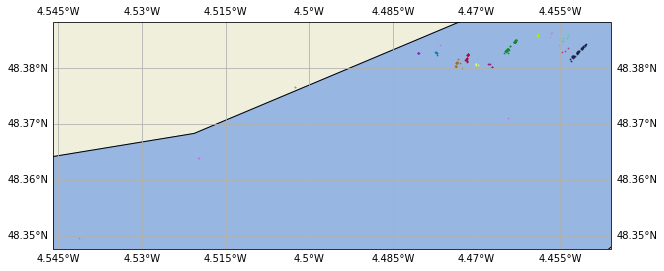

In [158]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import random
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
#x, y =circle_buffer.exterior.xy
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
for cluster in test_df.cluster.unique():
    ax.scatter(test_df[test_df.cluster==cluster].lon.values, test_df[test_df.cluster==cluster].lat.values, color=(random.random(),random.random(),random.random()), s=0.5, alpha=1)
#ax.plot(x, y)
#plt.ylim(top=48.52)
#plt.xlim(right=-4.63)
#plt.xlim(left=-4.3)

#plt.savefig('docked-ships-map.png')
plt.show()

In [159]:

import shapely


def make_polygons(df):
    df.sort_values(by=['cluster'], ascending=[True], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['geometry'] = [shapely.geometry.Point(xy) for xy in zip(df['lon'], df['lat'])]
    anchs_clusters = pd.DataFrame()
    anchs_clusters_gdf = gpd.GeoDataFrame()
    gb = df.groupby('cluster')
    for y in gb.groups:
        df0 = gb.get_group(y).copy()
        point_collection = shapely.geometry.MultiPoint(list(df0['geometry']))
        # point_collection.envelope
        convex_hull_polygon = point_collection.convex_hull
        anchs_clusters = anchs_clusters.append(pd.DataFrame(data={'anchorage_id':[y],'geometry':[convex_hull_polygon]}))
        anchs_clusters_gdf = anchs_clusters_gdf.append(gpd.GeoDataFrame({'anchorage_id':[y],'geometry':[convex_hull_polygon]}))
    anchs_clusters.reset_index(inplace=True)
    anchs_clusters_gdf.reset_index(inplace=True)
    anchs_clusters_gdf.crs = 'epsg:4326'
    return anchs_clusters_gdf


/home/jussiste/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/jussiste/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


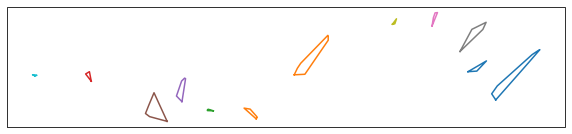

In [160]:
anchs_clusters = make_polygons(test_df)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
for cluster in anchs_clusters.geometry[1:]:
    x, y = cluster.exterior.xy
    ax.plot(x,y)


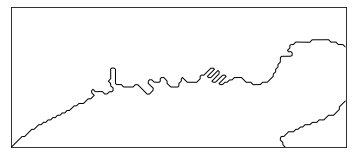

In [161]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


 
llcrnrlat=48.35918890639375
llcrnrlon=-4.535391312214044
urcrnrlon=-4.417021242334729
urcrnrlat= 48.40895719576783
map = Basemap(projection='cyl',resolution='f', llcrnrlat=llcrnrlat, llcrnrlon = llcrnrlon, urcrnrlat=urcrnrlat, urcrnrlon= urcrnrlon)


map.drawcoastlines()

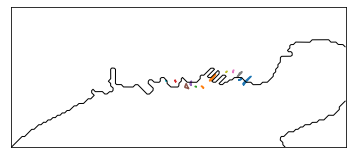

In [162]:
for cluster in anchs_clusters.geometry[1:]:
    x, y = cluster.exterior.xy
    map.plot(x,y)
map.drawcoastlines()

In [163]:
anchs_clusters.dtypes

index              int64
anchorage_id       int64
geometry        geometry
dtype: object

In [164]:
from st_visions.st_visualizer import st_visualizer
import st_visions.callbacks as callbacks
import st_visions.express as viz_express
import st_visions.geom_helper as viz_helper
def draw_clusters(clusters):
    st_viz = st_visualizer(allow_complex_geometries=False)
    st_viz.set_data(clusters)
    viz_express.plot_polygons_on_map(st_viz, polygon_type='patches')
    #st_viz.set_data(test_df_geo)
    #viz_express.plot_points_on_map(st_viz, color='red')
    st_viz.show_figures(notebook=True, notebook_url='localhost:8888')


In [166]:
anchs_clusters_gdf = anchs_clusters.copy()
anchs_clusters_gdf.geometry = anchs_clusters_gdf.geometry.buffer(0.0005)
draw_clusters(anchs_clusters_gdf.drop(index=0))

<ipython-input-166-363b8348284c>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anchs_clusters_gdf.geometry = anchs_clusters_gdf.geometry.buffer(0.0005)


Loading BokehJS ...

In [167]:
from sklearn.cluster import OPTICS


df_moored = df[df.navigationalstatus==5]
kms_per_radian = 6371.0088
epsilon = 0.2 / kms_per_radian
optics = OPTICS(min_samples=3, max_eps= epsilon, metric='haversine')

In [168]:
test_df.groupby('cluster').sourcemmsi.unique()

cluster
-1     [246497000, 248976000, 219124000, 244810418, 2...
 0     [565494000, 256494000, 538002756, 228292700, 2...
 1     [246497000, 357773000, 305886000, 356904000, 3...
 2     [244329000, 244847000, 305122000, 245181000, 2...
 3     [305166000, 246388000, 273413060, 311164000, 2...
 4     [235100629, 308218000, 477024600, 256341000, 5...
 5     [256765000, 248363000, 248373000, 249104000, 2...
 6          [249959000, 256462000, 636016149, 257739000]
 7     [246388000, 235050032, 245257000, 249297000, 6...
 8          [309225000, 538006224, 356071000, 311027900]
 9     [309361000, 309165000, 308541000, 212373000, 3...
 10                    [311027800, 220417000, 249297000]
 11    [477078200, 373570000, 247360700, 412069000, 4...
Name: sourcemmsi, dtype: object

In [169]:
coords = np.radians(df_moored.head(10000)[['lat','lon']].values)

In [170]:
oc = optics.fit(coords)

/home/jussiste/.local/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [171]:
len(oc.labels_)

10000

In [172]:
test_df.sort_values('t', inplace = True)

/home/jussiste/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [173]:
df_geo['dlon'] = df_geo.groupby('id').lon.diff()
df_geo['dlat'] = df_geo.groupby('id').lat.diff()


In [174]:
df_geo[df_geo.navigationalstatus==5].dlon.describe()

count    2.009780e+05
mean    -8.373021e-07
std      3.186287e-04
min     -7.843670e-02
25%     -1.000000e-05
50%      0.000000e+00
75%      1.000000e-05
max      7.825000e-02
Name: dlon, dtype: float64

In [175]:
df_geo[df_geo.navigationalstatus==1].dlon.describe()

count    31842.000000
mean         0.000002
std          0.000275
min         -0.005972
25%         -0.000043
50%          0.000000
75%          0.000045
max          0.039553
Name: dlon, dtype: float64

In [176]:
df_geo = pd.read_csv('port_data6km_ct.csv')
#df_geo = df_geo[(df_geo.calculated_speed>0) & (df_geo.calculated_speed<1)]

In [177]:
df_geo.drop_duplicates(keep='first', inplace=True) # Drop duplicates
df_geo.drop_duplicates(subset=['sourcemmsi', 't'], inplace=True) 

In [178]:
df_geo = calculate_distance_and_speed(df_geo.rename(columns= {'sourcemmsi':'id'}))

In [179]:
df_geo[df_geo.calculated_speed>1]

,Unnamed: 0,id,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,...,coords,vessel_type_num,vessel_type_name,dt,lon_prev,lat_prev,lonrad,latrad,dist_m,calculated_speed
734106,6342023,207138000,0.0,-127.0,0.9,179.3,511.0,-4.472052,48.381393,1450444753,...,POINT (-4.4720516 48.381393),70.0,Cargo,9.0,-0.078052,0.844416,-0.078052,0.844415,9.010086,1.001121
734114,6342098,207138000,0.0,-127.0,1.4,171.9,511.0,-4.472034,48.380917,1450444833,...,POINT (-4.4720335 48.380917),70.0,Cargo,8.0,-0.078052,0.844408,-0.078052,0.844406,8.896701,1.112088
734139,6342346,207138000,0.0,-127.0,1.7,110.0,511.0,-4.470624,48.379660,1450445085,...,POINT (-4.4706235 48.37966),70.0,Cargo,10.0,-0.078029,0.844385,-0.078027,0.844384,10.015182,1.001518
734142,6342385,207138000,0.0,-127.0,1.6,114.1,511.0,-4.470288,48.379580,1450445114,...,POINT (-4.4702883 48.37958),70.0,Cargo,10.0,-0.078023,0.844384,-0.078021,0.844383,10.460856,1.046086
734173,6342671,207138000,0.0,-127.0,2.0,64.0,511.0,-4.469308,48.379100,1450445423,...,POINT (-4.4693084 48.3791),70.0,Cargo,10.0,-0.078007,0.844374,-0.078004,0.844375,13.033546,1.303355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877479,10131418,664209000,0.0,-127.0,10.1,255.9,511.0,-4.539155,48.349514,1454629180,...,POINT (-4.539155 48.349514),80.0,Tanker,9.0,-0.079214,0.843860,-0.079223,0.843858,41.553546,4.617061
877481,10131434,664209000,0.0,-127.0,9.9,255.6,511.0,-4.539903,48.349390,1454629191,...,POINT (-4.539903 48.34939),80.0,Tanker,11.0,-0.079223,0.843858,-0.079236,0.843856,56.969844,5.179077
877482,10131449,664209000,0.0,-127.0,10.1,256.1,511.0,-4.540659,48.349266,1454629201,...,POINT (-4.5406585 48.349266),80.0,Tanker,10.0,-0.079236,0.843856,-0.079249,0.843854,57.507894,5.750789
877483,10131459,664209000,0.0,-127.0,10.1,255.4,511.0,-4.541207,48.349180,1454629209,...,POINT (-4.541207 48.34918),80.0,Tanker,8.0,-0.079249,0.843854,-0.079259,0.843852,41.646300,5.205788


In [180]:
df_geo['speed_bool'] = (df_geo.calculated_speed<1)*1

In [181]:
df_geo.sort_values(['id', 't'], inplace=True)

In [182]:
consecutives = df_geo['speed_bool'].diff().ne(0).cumsum()

In [183]:
df_geo['stop_num'] = consecutives

In [184]:
sum((df_geo['t'].groupby(consecutives).agg(max)- df_geo['t'].groupby(consecutives).agg(min))>3600)

555

In [185]:
df_geo['over_hour'] =df_geo.stop_num.map((df_geo['t'].groupby(consecutives).agg(max)- df_geo['t'].groupby(consecutives).agg(min))>3600)

In [186]:
stop_groups = df_geo[df_geo.over_hour].groupby('stop_num')

In [187]:
lon = stop_groups.lon.describe()['50%'].values
lat = stop_groups.lat.describe()['50%'].values

In [188]:
coords = list(zip(lat,lon))

In [189]:
coords = list(zip(lat,lon))
kms_per_radian = 6371.0088
epsilon = 0.1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

In [190]:
db.labels_

array([ 0, -1, -1,  1,  2,  3,  2,  4,  4,  5,  3,  2,  3,  2,  3, -1,  0,
        2,  0,  0,  0,  5,  6,  7, -1,  0,  5,  0, -1,  8,  0,  0,  0,  0,
        0, 17,  9,  9, -1,  3,  5,  0, -1, 25, -1, 10, -1, -1,  8,  4,  5,
        3,  3,  3,  2,  3, -1, 11, 11, 11, 11, -1, 11, 11, 11, 11, -1, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, -1, -1, 11, 11, 11, 11, 11,
       -1,  3,  3,  3,  3,  0,  0,  3,  3,  3,  3, -1,  0, 12, -1,  5, 13,
       13,  2,  8,  0, -1, 16, 14,  3,  0,  0,  5, -1,  3,  3, 15,  3,  5,
        4, -1, 14,  3,  5,  3, -1, -1, -1, 16,  3, 17,  9, 18,  9, 19,  0,
       -1, -1, -1, -1,  9,  5, 13, -1, 18,  0,  0,  0,  0,  0,  7,  9,  9,
        7,  4,  4,  4, 13, 13, 13, -1,  9,  9, -1, 20, 20, 20, 12,  9,  5,
       20, -1, 20, 13, 13, 13, 13, 13, 20, -1,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  2,  0,
        2,  3,  1,  5,  3, -1, -1, -1, -1,  0,  0, -1,  0,  0, -1,  0, 24,
       14,  3, -1, 16, -1

In [191]:
clusters = pd.DataFrame.from_dict({'lat': lat, 'lon':lon, 'cluster': db.labels_})

In [192]:
cluster_polygons = make_polygons(clusters)
cluster_polygons.geometry = cluster_polygons.geometry.buffer(0.0005)

<ipython-input-192-f0ef6e915fb9>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cluster_polygons.geometry = cluster_polygons.geometry.buffer(0.0005)


In [194]:
draw_clusters(cluster_polygons.drop(index=0))

Loading BokehJS ...

In [195]:
s= gpd.read_file('../data_wrangling_test/data/[C1] World Port Index/WPI.shp')

In [196]:
s.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 79 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   INDEX_NO    3684 non-null   float64 
 1   REGION_NO   3684 non-null   float64 
 2   PORT_NAME   3684 non-null   object  
 3   COUNTRY     3684 non-null   object  
 4   LATITUDE    3684 non-null   float64 
 5   LONGITUDE   3684 non-null   float64 
 6   LAT_DEG     3684 non-null   float64 
 7   LAT_MIN     3684 non-null   float64 
 8   LAT_HEMI    3684 non-null   object  
 9   LONG_DEG    3684 non-null   float64 
 10  LONG_MIN    3684 non-null   float64 
 11  LONG_HEMI   3684 non-null   object  
 12  PUB         3677 non-null   object  
 13  CHART       3676 non-null   object  
 14  HARBORSIZE  3679 non-null   object  
 15  HARBORTYPE  3677 non-null   object  
 16  SHELTER     3653 non-null   object  
 17  ENTRY_TIDE  2786 non-null   object  
 18  ENTRYSWELL  2876 non-null   object  
 19

In [197]:
test_lines = gpd.read_file('test.shp')

In [199]:
draw_clusters(anchs_clusters[(anchs_clusters.anchorage_id==8) | (anchs_clusters.anchorage_id==2)])

Loading BokehJS ...

In [200]:
anchs_clusters.geometry = anchs_clusters.geometry.buffer(0.0005)
def check_points_in_ports(anchs):
    for poly in anchs.geometry:
        intersect = False
        for line in test_lines.geometry:
            if poly.intersects(line):
                intersect= True
        assert intersect
        
        
check_points_in_ports(anchs_clusters)

<ipython-input-200-761b34926732>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anchs_clusters.geometry = anchs_clusters.geometry.buffer(0.0005)


In [201]:
df.sort_values(['sourcemmsi', 't'],inplace=True)

In [202]:
df['berth_num'] = df.new_berth.cumsum()

In [203]:
berth_visits = df[df.navigationalstatus==5].groupby('berth_num')

In [204]:
lon = berth_visits.lon.describe()['50%'].values
lat = berth_visits.lat.describe()['50%'].values
coords = list(zip(lat,lon))

In [205]:
def train_model(coords):
    kms_per_radian = 6371.0088
    epsilon = 0.1 / kms_per_radian
    db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    return db.labels_

In [206]:
labels = train_model(coords)

In [207]:
clusters = pd.DataFrame.from_dict({'lat': lat, 'lon':lon, 'cluster': labels})

In [208]:
anchs = make_polygons(clusters)

In [209]:
anchs_clusters_gdf

,index,anchorage_id,geometry
0,0,-1,"POLYGON ((-4.54120 48.34901, -4.54125 48.34899..."
1,0,0,"POLYGON ((-4.45267 48.38096, -4.45270 48.38092..."
2,0,1,"POLYGON ((-4.46499 48.38228, -4.46504 48.38228..."
3,0,2,"POLYGON ((-4.46967 48.38112, -4.46963 48.38110..."
4,0,3,"POLYGON ((-4.47659 48.38249, -4.47658 48.38244..."
5,0,4,"POLYGON ((-4.47121 48.38107, -4.47122 48.38103..."
6,0,5,"POLYGON ((-4.47212 48.38022, -4.47210 48.38018..."
7,0,6,"POLYGON ((-4.45636 48.38550, -4.45638 48.38545..."
8,0,7,"POLYGON ((-4.45482 48.38381, -4.45485 48.38377..."
9,0,8,"POLYGON ((-4.45909 48.38529, -4.45914 48.38529..."


In [211]:
anchs_clusters_gdf.geometry = anchs_clusters_gdf.geometry.buffer(0.0005)
draw_clusters(anchs_clusters_gdf[1:])


<ipython-input-211-bc560afdc9f6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anchs_clusters_gdf.geometry = anchs_clusters_gdf.geometry.buffer(0.0005)


Loading BokehJS ...

In [212]:
clusters.groupby('cluster').size()

cluster
-1    13
 0    42
 1     6
 2    61
 3     4
 4    11
 5     4
 6    65
 7     6
 8     6
 9     4
dtype: int64

In [213]:
anchs.geometry = anchs.geometry.buffer(0.0005)
check_points_in_ports(anchs)

<ipython-input-213-0f686c917992>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anchs.geometry = anchs.geometry.buffer(0.0005)


In [215]:
draw_clusters(test_lines)

Loading BokehJS ...

In [216]:
def intersection(point):
    for index, cluster in anchs_clusters_gdf[1:].iterrows():
        if point.within(cluster.geometry):
            return cluster.anchorage_id
    return -1

In [217]:
anchs_clusters_gdf

,index,anchorage_id,geometry
0,0,-1,"POLYGON ((-4.54107 48.34852, -4.54109 48.34852..."
1,0,0,"POLYGON ((-4.45229 48.38063, -4.45231 48.38061..."
2,0,1,"POLYGON ((-4.46497 48.38178, -4.46499 48.38178..."
3,0,2,"POLYGON ((-4.46952 48.38159, -4.46950 48.38158..."
4,0,3,"POLYGON ((-4.47610 48.38259, -4.47610 48.38256..."
5,0,4,"POLYGON ((-4.47072 48.38096, -4.47073 48.38094..."
6,0,5,"POLYGON ((-4.47166 48.38043, -4.47165 48.38041..."
7,0,6,"POLYGON ((-4.45590 48.38531, -4.45591 48.38529..."
8,0,7,"POLYGON ((-4.45447 48.38345, -4.45449 48.38343..."
9,0,8,"POLYGON ((-4.45900 48.38480, -4.45903 48.38480..."


In [218]:
#df['cluster'] = df.geometry.apply(lambda x: intersection(x))


In [219]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs='epsg:4326')
df_geo['cluster'] = -1
for i, cluster in anchs_clusters_gdf[1:].iterrows():
    geom = cluster.geometry
    sindex = df_geo.sindex
    possible_matches_index = list(sindex.intersection(geom.bounds))
    possible_matches = df_geo.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(geom)]
    df_geo.loc[precise_matches.index, 'cluster'] = cluster.anchorage_id

In [220]:
# Makes movement within possible overlapping clusters not registering as leaving from clusters
df_geo.loc[df_geo.cluster==-1, 'cluster'] = -999
df_geo.sort_values(['sourcemmsi','t'], inplace=True)
df_geo['enters_cluster']=df_geo.groupby('sourcemmsi').cluster.diff()>100
df_geo['leaves_cluster']=df_geo.groupby('sourcemmsi').cluster.diff()<-100

In [221]:
anchs_clusters_gdf.geometry = anchs_clusters_gdf.geometry.buffer(0.0005)

<ipython-input-221-099695037136>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anchs_clusters_gdf.geometry = anchs_clusters_gdf.geometry.buffer(0.0005)


In [222]:
import pytz

df_geo['Date'] = pd.to_datetime(df_geo.t,unit='s')
df_geo['Date'] = df_geo['Date'].apply(lambda x: x.tz_localize('UTC').tz_convert('Europe/Paris'))

df_geo['clock'] = df_geo.Date.apply(lambda x: x.time())

df_geo['weekday'] = df_geo.Date.apply(lambda x: x.weekday())

In [223]:
df_geo.clock

728019    10:28:45
728020    10:28:54
728022    10:29:05
728023    10:29:15
728024    10:29:26
            ...   
877479    00:39:40
877481    00:39:51
877482    00:40:01
877483    00:40:09
877484    00:40:21
Name: clock, Length: 1008448, dtype: object

In [224]:
df_geo.weekday

728019    2
728020    2
728022    2
728023    2
728024    2
         ..
877479    4
877481    4
877482    4
877483    4
877484    4
Name: weekday, Length: 1008448, dtype: int64

In [225]:
df_geo[(df_geo.enters_cluster)]

,Unnamed: 0,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,...,vessel_type_name,new_berth,geometry,berth_num,cluster,enters_cluster,leaves_cluster,Date,clock,weekday
761154,7155578,209015000,0.0,0.0,1.7,314.6,281.0,-4.466455,48.379610,1451743050,...,Cargo,False,POINT (-4.46645 48.37961),1,11,True,False,2016-01-02 14:57:30+01:00,14:57:30,5
81320,793171,211135000,0.0,0.0,1.1,28.0,208.0,-4.453542,48.380547,1444389834,...,Tanker,False,POINT (-4.45354 48.38055),2,0,True,False,2015-10-09 13:23:54+02:00,13:23:54,4
729379,6243742,211286440,0.0,0.0,1.1,318.0,236.0,-4.462725,48.383470,1450321243,...,Cargo,False,POINT (-4.46272 48.38347),3,1,True,False,2015-12-17 04:00:43+01:00,04:00:43,3
943036,12122164,211330520,0.0,0.0,2.1,31.0,211.0,-4.453510,48.380592,1456651100,...,Tanker,False,POINT (-4.45351 48.38059),3,0,True,False,2016-02-28 10:18:20+01:00,10:18:20,6
829627,8900101,211379750,0.0,0.0,1.7,36.7,210.0,-4.453482,48.380720,1453570698,...,Tanker,False,POINT (-4.45348 48.38072),4,0,True,False,2016-01-23 18:38:18+01:00,18:38:18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972697,13668647,636016595,0.0,0.0,1.8,29.0,214.0,-4.453748,48.380720,1458037729,...,Tanker,False,POINT (-4.45375 48.38072),268,0,True,False,2016-03-15 11:28:49+01:00,11:28:49,1
768425,7312627,636091933,0.0,0.0,1.4,44.1,219.0,-4.455963,48.383570,1452016981,...,Cargo,False,POINT (-4.45596 48.38357),269,7,True,False,2016-01-05 19:03:01+01:00,19:03:01,1
522275,3361463,636092263,0.0,15.0,1.2,323.3,345.0,-4.471645,48.379726,1447178235,...,Cargo,False,POINT (-4.47164 48.37973),271,5,True,False,2015-11-10 18:57:15+01:00,18:57:15,1
555090,3585237,636092263,0.0,-21.0,3.3,72.6,255.0,-4.468262,48.379772,1447420952,...,Cargo,False,POINT (-4.46826 48.37977),272,11,True,False,2015-11-13 14:22:32+01:00,14:22:32,4


In [226]:
entry_times = df_geo[(df_geo.enters_cluster)][['clock', 'cluster']]
entry_times.clock = entry_times.clock.apply(lambda x: (x.hour*60 +x.minute)*60+x.second)
entry_times_desc = entry_times.groupby('cluster').clock.describe()
import datetime
for column in entry_times_desc.columns[1:]:
    entry_times_desc[column] = entry_times_desc[column].apply(lambda x: datetime.timedelta(seconds=x))

In [227]:
df_geo.sort_values(['sourcemmsi', 't'])

,Unnamed: 0,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,...,vessel_type_name,new_berth,geometry,berth_num,cluster,enters_cluster,leaves_cluster,Date,clock,weekday
728019,16100077,207138000,15.0,-127.0,0.0,32.5,511.0,-4.471835,48.381720,1450258125,...,Cargo,False,POINT (-4.47183 48.38172),0,4,False,False,2015-12-16 10:28:45+01:00,10:28:45,2
728020,16100082,207138000,15.0,-127.0,0.0,32.2,511.0,-4.471833,48.381720,1450258134,...,Cargo,False,POINT (-4.47183 48.38172),0,4,False,False,2015-12-16 10:28:54+01:00,10:28:54,2
728022,16100092,207138000,15.0,-127.0,0.0,46.5,511.0,-4.471833,48.381634,1450258145,...,Cargo,False,POINT (-4.47183 48.38163),0,4,False,False,2015-12-16 10:29:05+01:00,10:29:05,2
728023,16100096,207138000,15.0,-127.0,0.0,47.2,511.0,-4.471849,48.381634,1450258155,...,Cargo,False,POINT (-4.47185 48.38163),0,4,False,False,2015-12-16 10:29:15+01:00,10:29:15,2
728024,16100098,207138000,15.0,-127.0,0.0,59.2,511.0,-4.471873,48.381630,1450258166,...,Cargo,False,POINT (-4.47187 48.38163),0,4,False,False,2015-12-16 10:29:26+01:00,10:29:26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877479,10131418,664209000,0.0,-127.0,10.1,255.9,511.0,-4.539155,48.349514,1454629180,...,Tanker,False,POINT (-4.53916 48.34951),273,-999,False,False,2016-02-05 00:39:40+01:00,00:39:40,4
877481,10131434,664209000,0.0,-127.0,9.9,255.6,511.0,-4.539903,48.349390,1454629191,...,Tanker,False,POINT (-4.53990 48.34939),273,-999,False,False,2016-02-05 00:39:51+01:00,00:39:51,4
877482,10131449,664209000,0.0,-127.0,10.1,256.1,511.0,-4.540659,48.349266,1454629201,...,Tanker,False,POINT (-4.54066 48.34927),273,-999,False,False,2016-02-05 00:40:01+01:00,00:40:01,4
877483,10131459,664209000,0.0,-127.0,10.1,255.4,511.0,-4.541207,48.349180,1454629209,...,Tanker,False,POINT (-4.54121 48.34918),273,-999,False,False,2016-02-05 00:40:09+01:00,00:40:09,4


In [228]:
df_geo.loc[df_geo.cluster==-1, 'cluster'] = -999

In [229]:
df_geo.sort_values(['sourcemmsi', 't'], inplace=True)

In [230]:
df_geo.sort_values(['sourcemmsi','t'],inplace=True)
df_geo.leaves_cluster = df_geo.groupby('sourcemmsi').leaves_cluster.shift(-1)
df_geo.leaves_cluster.fillna(False, inplace=True)

In [231]:
dep_times = df_geo[(df_geo.leaves_cluster)][['clock', 'cluster']]
dep_times.clock = dep_times.clock.apply(lambda x: (x.hour*60 +x.minute)*60+x.second)
dep_times_desc = dep_times.groupby('cluster').clock.describe()
import datetime
for column in dep_times_desc.columns[1:]:
    dep_times_desc[column] = dep_times_desc[column].apply(lambda x: datetime.timedelta(seconds=x))

In [232]:
df_geo[df_geo.leaves_cluster]

,Unnamed: 0,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,...,vessel_type_name,new_berth,geometry,berth_num,cluster,enters_cluster,leaves_cluster,Date,clock,weekday
734125,6342193,207138000,0.0,-127.0,1.4,143.5,511.0,-4.471613,48.380234,1450444945,...,Cargo,False,POINT (-4.47161 48.38023),0,5,False,True,2015-12-18 14:22:25+01:00,14:22:25,4
776250,16592428,209015000,0.0,-126.0,3.4,171.1,150.0,-4.467340,48.379196,1452274970,...,Cargo,False,POINT (-4.46734 48.37920),2,11,False,True,2016-01-08 18:42:50+01:00,18:42:50,4
86743,15039492,211135000,5.0,0.0,2.4,203.3,218.0,-4.453163,48.380985,1444486394,...,Tanker,False,POINT (-4.45316 48.38099),3,0,False,True,2015-10-10 16:13:14+02:00,16:13:14,5
732811,6281846,211286440,0.0,-126.0,2.6,184.0,179.0,-4.464955,48.381840,1450357294,...,Cargo,False,POINT (-4.46495 48.38184),3,1,False,True,2015-12-17 14:01:34+01:00,14:01:34,3
948673,17499995,211330520,5.0,0.0,3.9,208.1,214.0,-4.453415,48.380383,1456761182,...,Tanker,False,POINT (-4.45341 48.38038),4,0,False,True,2016-02-29 16:53:02+01:00,16:53:02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975358,17850811,636016595,5.0,0.0,3.8,215.0,215.0,-4.453915,48.380900,1458125238,...,Tanker,False,POINT (-4.45392 48.38090),269,0,False,True,2016-03-16 11:47:18+01:00,11:47:18,2
771891,7383431,636091933,0.0,0.0,2.3,227.4,220.0,-4.456099,48.384020,1452104472,...,Cargo,False,POINT (-4.45610 48.38402),270,7,False,True,2016-01-06 19:21:12+01:00,19:21:12,2
555015,3585081,636092263,0.0,-23.0,2.5,138.2,336.0,-4.471597,48.380077,1447420781,...,Cargo,False,POINT (-4.47160 48.38008),272,5,False,True,2015-11-13 14:19:41+01:00,14:19:41,4
555191,15506869,636092263,0.0,-16.0,3.1,170.4,156.0,-4.467147,48.379240,1447421204,...,Cargo,False,POINT (-4.46715 48.37924),272,11,False,True,2015-11-13 14:26:44+01:00,14:26:44,4


In [233]:
ships_per_cluster = df_geo.groupby('cluster').sourcemmsi.unique()

In [234]:
ships_per_cluster.apply(lambda x: len(x))

cluster
-999    149
 0       45
 1       16
 2       24
 3        9
 4       31
 5       41
 6        7
 7        6
 8        5
 9        6
 10       5
 11      26
Name: sourcemmsi, dtype: int64

In [235]:
data_table = pd.DataFrame().from_dict({'Unique ships':[], 'Mean arrival time': [],'Mean departing time' : [], 'Mean time in cluster':[], 'Maximum ship length': [], 'Maximum ship draft': [], 'Ship types': []})

In [236]:
data_table['Unique ships'] = ships_per_cluster.apply(lambda x: len(x))

In [237]:
data_table['Mean arrival time'] = entry_times_desc['mean']
data_table['Mean departing time'] = dep_times_desc['mean']

In [238]:
def td_to_str(td):
    """
    convert a timedelta object td to a string in HH:MM:SS format.
    """
    if pd.isnull(td):
        return 0
    hours, remainder = divmod(td.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    
    return f'{int(hours):02}:{int(minutes):02}:{int(seconds):02}'

In [262]:
data_table['Mean arrival time'] = data_table['Mean arrival time'].apply(td_to_str)
data_table['Mean departing time'] = data_table['Mean departing time'].apply(td_to_str)

In [240]:
df_geo.sort_values(['sourcemmsi','t'], inplace=True)
df_geo['change_in_cluster'] = (df_geo['enters_cluster'] | df_geo['leaves_cluster']).cumsum()

In [241]:
visits = df_geo[df_geo.cluster>-1].groupby('change_in_cluster')

In [242]:
times = visits.Date.max()-visits.Date.min()
clusters = visits.cluster.describe()['50%']

visits_df = pd.DataFrame().from_dict({'time': times.values, 'cluster': clusters.values})

In [243]:
visits_df = visits_df[visits_df.time>datetime.timedelta(minutes=30)]

In [265]:
data_table['Mean time in cluster'] = visits_df.groupby('cluster').time.describe()['mean']

In [266]:
data_table

,Unique ships,Mean arrival time,Mean departing time,Mean time in cluster,Maximum ship length,Maximum ship draft,Ship types,Maximum ship beam
cluster,,,,,,,,
0,45,12:30:23,13:23:41,0 days 21:47:27.815384615,192.0,11.5,"[Tanker, Cargo]",29.0
1,16,10:45:42,13:26:43,0 days 19:26:42.528571428,280.0,12.9,[Cargo],33.0
2,24,12:19:08,13:21:46,1 days 01:02:25.285714285,199.0,12.3,"[Cargo, Tanker]",32.0
3,9,14:08:19,15:20:21,3 days 21:50:49.857142857,190.0,10.8,"[Cargo, Tanker]",23.0
4,31,13:32:44,16:15:47,2 days 11:28:49.588235294,190.0,12.3,"[Cargo, Tanker]",32.0
5,41,13:14:46,15:17:28,0 days 22:23:49.058823529,190.0,12.3,"[Cargo, Tanker]",32.0
6,7,18:17:21,17:27:39,1 days 18:53:21.750000,288.0,10.0,"[Cargo, Tanker]",49.0
7,6,15:42:44,15:10:21,6 days 08:26:51.750000,196.0,9.0,"[Tanker, Cargo]",31.0
8,5,12:54:58,18:04:05,20 days 13:57:13,291.0,9.5,"[Tanker, Cargo]",48.0


In [246]:
static_data = pd.read_csv('nari_static.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [247]:
static_data['length'] = static_data.tobow + static_data.tostern
static_data['beam'] = static_data.tostarboard + static_data.toport

In [248]:
static_desc = static_data.groupby('sourcemmsi')[['length', 'beam', 'draught']].describe()

In [249]:
static_df = pd.DataFrame().from_dict({'max_length': static_desc['length']['max'],'max_beam':static_desc['beam']['max'], 'max_draft' : static_desc['draught']['max']})

In [250]:
static_df.loc[211286440]

max_length    118.0
max_beam       18.0
max_draft       6.9
Name: 211286440, dtype: float64

In [251]:
df_geo.groupby('cluster').sourcemmsi.unique()[1:]

cluster
0     [211135000, 211330520, 211379750, 211472000, 2...
1     [211286440, 220439000, 236111947, 245257000, 2...
2     [212109000, 212360000, 218615000, 228292700, 2...
3     [228068600, 245547000, 246254000, 246388000, 2...
4     [207138000, 212109000, 212360000, 212542000, 2...
5     [207138000, 212109000, 212360000, 212542000, 2...
6     [245257000, 248730000, 249297000, 249959000, 2...
7     [235050032, 244860000, 245257000, 246388000, 2...
8     [309225000, 311027900, 311153000, 356071000, 5...
9     [212373000, 306872000, 308541000, 309165000, 3...
10    [220417000, 249297000, 257739000, 311027800, 5...
11    [209015000, 218615000, 228292700, 244329000, 2...
Name: sourcemmsi, dtype: object

In [252]:
df_geo.groupby('cluster').sourcemmsi.unique()[1]

array([211286440, 220439000, 236111947, 245257000, 246497000, 305600000,
       305709000, 305886000, 356071000, 356101000, 356904000, 357773000,
       538005528, 636015129, 636016436, 636016457])

In [253]:
def map_value(ind, col):
    return static_df.loc[ind][col]

map_func_len = lambda x: map_value(x, 'max_length')
map_func_beam = lambda x: map_value(x, 'max_beam')
map_func_draft = lambda x: map_value(x, 'max_draft')

max_len = [0]
max_beam = [0]
max_draft = [0]
for cluster in df_geo.groupby('cluster').sourcemmsi.unique()[1:]:
    max_len.append(max(map_func_len(cluster)))
    max_beam.append(max(map_func_beam(cluster)))
    max_draft.append(max(map_func_draft(cluster)))

In [254]:
data_table['Maximum ship length'] = max_len
data_table['Maximum ship beam'] = max_beam
data_table['Maximum ship draft'] = max_draft

In [263]:
data_table

,Unique ships,Mean arrival time,Mean departing time,Mean time in cluster,Maximum ship length,Maximum ship draft,Ship types,Maximum ship beam
cluster,,,,,,,,
0,45,12:30:23,13:23:41,21:47:27,192.0,11.5,"[Tanker, Cargo]",29.0
1,16,10:45:42,13:26:43,19:26:42,280.0,12.9,[Cargo],33.0
2,24,12:19:08,13:21:46,25:02:25,199.0,12.3,"[Cargo, Tanker]",32.0
3,9,14:08:19,15:20:21,93:50:49,190.0,10.8,"[Cargo, Tanker]",23.0
4,31,13:32:44,16:15:47,59:28:49,190.0,12.3,"[Cargo, Tanker]",32.0
5,41,13:14:46,15:17:28,22:23:49,190.0,12.3,"[Cargo, Tanker]",32.0
6,7,18:17:21,17:27:39,42:53:21,288.0,10.0,"[Cargo, Tanker]",49.0
7,6,15:42:44,15:10:21,152:26:51,196.0,9.0,"[Tanker, Cargo]",31.0
8,5,12:54:58,18:04:05,493:57:13,291.0,9.5,"[Tanker, Cargo]",48.0


In [297]:
data_table['Ship types'] = (df_geo.groupby('cluster').vessel_type_name.value_counts()/df_geo.groupby('cluster').size()*100).drop(index=-999)

TypeError: incompatible index of inserted column with frame index

In [257]:
data_table.drop(index=-999, inplace = True)

In [267]:
data_table['Mean time in cluster'] = data_table['Mean time in cluster'].apply(lambda x: str(x).split(".")[0])

In [318]:
df_geo[df_geo.enters_cluster]

,Unnamed: 0,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t,...,new_berth,geometry,berth_num,cluster,enters_cluster,leaves_cluster,Date,clock,weekday,change_in_cluster
761154,7155578,209015000,0.0,0.0,1.7,314.6,281.0,-4.466455,48.379610,1451743050,...,False,POINT (-4.46645 48.37961),1,11,True,False,2016-01-02 14:57:30+01:00,14:57:30,5,2
81320,793171,211135000,0.0,0.0,1.1,28.0,208.0,-4.453542,48.380547,1444389834,...,False,POINT (-4.45354 48.38055),2,0,True,False,2015-10-09 13:23:54+02:00,13:23:54,4,4
729379,6243742,211286440,0.0,0.0,1.1,318.0,236.0,-4.462725,48.383470,1450321243,...,False,POINT (-4.46272 48.38347),3,1,True,False,2015-12-17 04:00:43+01:00,04:00:43,3,6
943036,12122164,211330520,0.0,0.0,2.1,31.0,211.0,-4.453510,48.380592,1456651100,...,False,POINT (-4.45351 48.38059),3,0,True,False,2016-02-28 10:18:20+01:00,10:18:20,6,8
829627,8900101,211379750,0.0,0.0,1.7,36.7,210.0,-4.453482,48.380720,1453570698,...,False,POINT (-4.45348 48.38072),4,0,True,False,2016-01-23 18:38:18+01:00,18:38:18,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972697,13668647,636016595,0.0,0.0,1.8,29.0,214.0,-4.453748,48.380720,1458037729,...,False,POINT (-4.45375 48.38072),268,0,True,False,2016-03-15 11:28:49+01:00,11:28:49,1,611
768425,7312627,636091933,0.0,0.0,1.4,44.1,219.0,-4.455963,48.383570,1452016981,...,False,POINT (-4.45596 48.38357),269,7,True,False,2016-01-05 19:03:01+01:00,19:03:01,1,613
522275,3361463,636092263,0.0,15.0,1.2,323.3,345.0,-4.471645,48.379726,1447178235,...,False,POINT (-4.47164 48.37973),271,5,True,False,2015-11-10 18:57:15+01:00,18:57:15,1,615
555090,3585237,636092263,0.0,-21.0,3.3,72.6,255.0,-4.468262,48.379772,1447420952,...,False,POINT (-4.46826 48.37977),272,11,True,False,2015-11-13 14:22:32+01:00,14:22:32,4,617


In [287]:
anchs_clusters_gdf.iloc[9:10]

,index,anchorage_id,geometry
9,0,8,"POLYGON ((-4.45998 48.38579, -4.45998 48.38580..."


In [315]:
draw_clusters(anchs_clusters_gdf[1:])

Loading BokehJS ...

In [352]:
ship_percentage = (df_geo.groupby('cluster').vessel_type_name.value_counts()/df_geo.groupby('cluster').size()*100).drop(index=-999).reset_index(level=[1])

In [322]:
df_geo[df_geo.leaves_cluster].groupby('cluster').size()

cluster
0     83
1     78
2     18
3     11
4      7
5     49
6      9
7      8
8      6
9      6
10     8
11    34
dtype: int64

In [349]:
no_z = df_geo[df_geo.cluster>-1]

data_table['Number of visits'] = no_z.groupby('cluster').change_in_cluster.unique().apply(lambda x:len(x))

In [334]:
df_geo.groupby('cluster').sourcemmsi.unique().apply(lambda x:len(x))

cluster
-999    149
 0       45
 1       16
 2       24
 3        9
 4       31
 5       41
 6        7
 7        6
 8        5
 9        6
 10       5
 11      26
Name: sourcemmsi, dtype: int64

In [348]:
no_z = df_geo[df_geo.cluster>-1]
no_z.groupby('cluster').change_in_cluster.unique().apply(lambda x:len(x))

cluster
0     161
1     155
2      50
3      22
4      50
5     108
6      17
7      16
8      10
9      12
10     18
11     68
Name: change_in_cluster, dtype: int64

In [350]:
c = list(data_table.columns)



#data_table = data_table.reindex(columns=column_names)

#data_table
data_table = data_table.reindex(columns= [c[8], c[0], c[1], c[2], c[3], c[4], c[5], c[7], c[6]])

In [351]:
data_table

,Number of visits,Unique ships,Mean arrival time,Mean departing time,Mean time in cluster,Maximum ship length,Maximum ship draft,Maximum ship beam,Ship types
cluster,,,,,,,,,
0,161,45,12:30:23,13:23:41,0 days 21:47:27,192.0,11.5,29.0,"[Tanker, Cargo]"
1,155,16,10:45:42,13:26:43,0 days 19:26:42,280.0,12.9,33.0,[Cargo]
2,50,24,12:19:08,13:21:46,1 days 01:02:25,199.0,12.3,32.0,"[Cargo, Tanker]"
3,22,9,14:08:19,15:20:21,3 days 21:50:49,190.0,10.8,23.0,"[Cargo, Tanker]"
4,50,31,13:32:44,16:15:47,2 days 11:28:49,190.0,12.3,32.0,"[Cargo, Tanker]"
5,108,41,13:14:46,15:17:28,0 days 22:23:49,190.0,12.3,32.0,"[Cargo, Tanker]"
6,17,7,18:17:21,17:27:39,1 days 18:53:21,288.0,10.0,49.0,"[Cargo, Tanker]"
7,16,6,15:42:44,15:10:21,6 days 08:26:51,196.0,9.0,31.0,"[Tanker, Cargo]"
8,10,5,12:54:58,18:04:05,20 days 13:57:13,291.0,9.5,48.0,"[Tanker, Cargo]"


In [367]:
ship_percentage.rename(columns= {0:'percentage'},inplace=True)

In [372]:
dicts = {}
for ind, row in ship_percentage.iterrows():
    

,vessel_type_name,percentage
cluster,,
0,Tanker,72.966622
0,Cargo,27.033378
1,Cargo,100.000000
2,Cargo,99.438990
2,Tanker,0.561010
3,Cargo,99.606127
3,Tanker,0.393873
4,Cargo,99.379327
4,Tanker,0.620673


In [316]:
static_data

,sourcemmsi,imonumber,callsign,shipname,shiptype,tobow,tostern,tostarboard,toport,eta,draught,destination,mothershipmmsi,t,length,beam
0,304091000,9509255.0,V2GU5,HC JETTE-MARIT,70.0,130.0,30.0,18.0,6.0,04-09 20:00,10.1,BREST,NaN,1443650423,160.0,24.0
1,228037600,0.0,FIHX,AEROUANT BREIZH,30.0,6.0,9.0,5.0,2.0,00-00 24:60,0.0,,NaN,1443650457,15.0,7.0
2,228064900,8304816.0,FITO,VN SAPEUR,51.0,21.0,54.0,10.0,6.0,29-09 12:00,5.9,RADE DE BREST,NaN,1443650471,75.0,16.0
3,227705102,262144.0,FGD5860,BINDY,60.0,9.0,26.0,5.0,4.0,00-00 24:60,0.0,,NaN,1443650474,35.0,9.0
4,227415000,0.0,FHAF,F/V JEREMI SIMON,90.0,11.0,9.0,3.0,3.0,00-00 24:60,0.0,,NaN,1443650479,20.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078612,982571400,NaN,NaN,NORMAND JARL MOB,59.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1458748380,2.0,2.0
1078613,982571400,NaN,NaN,NORMAND JARL MOB,59.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1458748688,2.0,2.0
1078614,982571400,NaN,NaN,NORMAND JARL MOB,59.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1458750234,2.0,2.0
1078615,982571400,NaN,NaN,NORMAND JARL MOB,59.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1458752419,2.0,2.0
